In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image
from src.optimization.transforms import BilateralFilter

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cuda")
img_size = 224

fatal: destination path 'ProtoPNet' already exists and is not an empty directory.


# Clamping to [0, 1]

step: 0/500, loss: 11.064412117004395
step: 100/500, loss: 0.20257383584976196
step: 200/500, loss: 0.08909545838832855
step: 300/500, loss: 0.17352016270160675
step: 400/500, loss: 0.051493123173713684


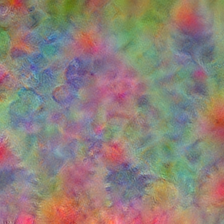

In [2]:
ptypes = [(188,1)]
size = (3, 224, 224)

init_tensor = torch.rand(size)
transforms = [ClampingMinMax(0, 1)]
robustness_transforms = [tfs.GaussianBlur(7, 2)]
parametrization_transforms = [NormalizationMeanStd()]
denormalization_transforms = [DenormalizationMeanStd()]

input_tensor = init_tensor.clone().cuda()
image_bf = visualize_prototypes(model, 
                                ptypes,
                                optimization_steps=500, 
                                input_tensor=input_tensor,
                                transforms=transforms, 
                                robustness_transforms=robustness_transforms,
                                parametrization_transforms=parametrization_transforms,
                                denormalization_transforms=denormalization_transforms,
                                optimizer_kwargs={'lr': 0.2}, 
                                print_interval=100,
                                display_interval=None)
pilimg_bf = tfs.ToPILImage()(image_bf)
display(pilimg_bf)

# Clamping to [-m/s, (1-m)/s]

step: 0/500, loss: 10.341804504394531
step: 100/500, loss: 0.08932215720415115
step: 200/500, loss: 0.0311540886759758
step: 300/500, loss: 0.11184849590063095
step: 400/500, loss: 0.05030698701739311


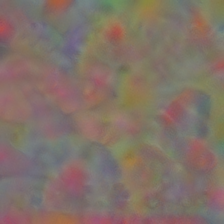

In [3]:
init_tensor = torch.randn(size)
transforms = [ClampingMeanStd()]
robustness_transforms = [tfs.GaussianBlur(7, 2)]
parametrization_transforms = None
denormalization_transforms = [DenormalizationMeanStd()]

input_tensor = init_tensor.clone().cuda()
image_bf = visualize_prototypes(model, 
                                ptypes,
                                optimization_steps=500, 
                                input_tensor=input_tensor,
                                transforms=transforms, 
                                robustness_transforms=robustness_transforms,
                                parametrization_transforms=parametrization_transforms,
                                denormalization_transforms=denormalization_transforms,
                                optimizer_kwargs={'lr': 0.2}, 
                                print_interval=100,
                                display_interval=None)
pilimg_bf = tfs.ToPILImage()(image_bf)
display(pilimg_bf)